# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

/tmp/ipykernel_5620/2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

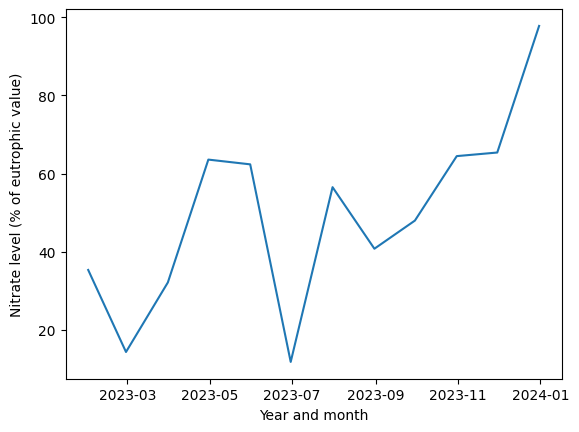

In [2]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

/tmp/ipykernel_5620/1726504607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

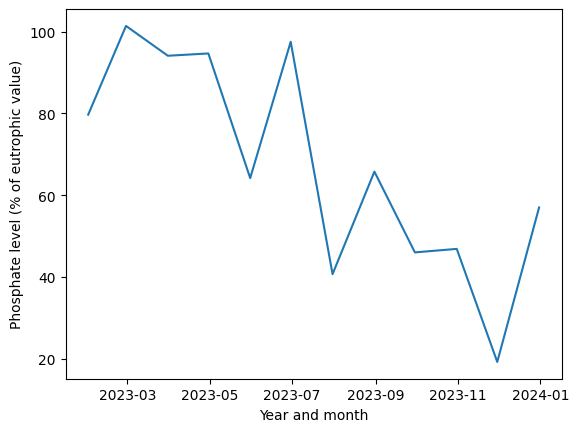

In [3]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

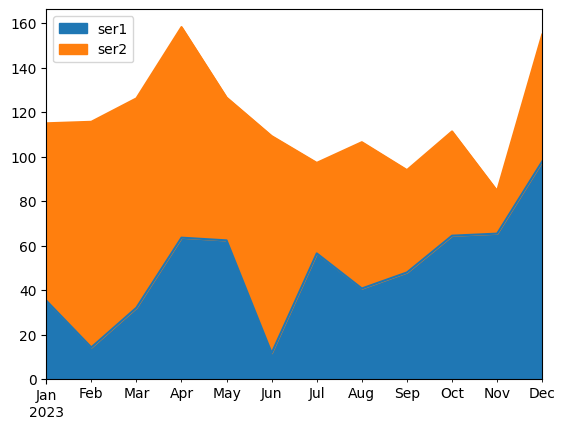

In [4]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

In [6]:
colorectal_cancer = pd.read_csv("colorectal_cancer_dataset.csv")
colorectal_cancer.iloc[0:5]

,Patient_ID,Country,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,...,Survival_5_years,Mortality,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status,Survival_Prediction
0,1,UK,77,M,Localized,69,No,No,Yes,Overweight,...,Yes,No,54413,50,5,Urban,Developed,Moderate,Insured,Yes
1,2,UK,59,M,Localized,33,No,No,No,Overweight,...,Yes,No,76553,37,25,Urban,Developing,High,Uninsured,Yes
2,3,Japan,66,M,Regional,17,No,Yes,No,Normal,...,Yes,No,62805,54,27,Urban,Developed,Moderate,Uninsured,No
3,4,USA,83,M,Regional,14,No,No,No,Obese,...,Yes,No,89393,45,11,Urban,Developed,Moderate,Insured,Yes
4,5,France,66,M,Localized,34,No,Yes,No,Normal,...,Yes,No,66425,15,27,Urban,Developing,High,Insured,Yes


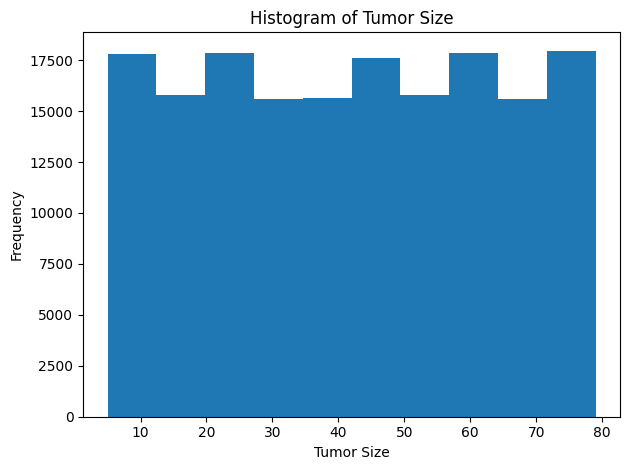

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

colorectal_cancer["Tumor_Size_mm"].plot.hist()
plt.title('Histogram of Tumor Size')
plt.xlabel('Tumor Size')
plt.ylabel('Frequency')
plt.grid(False)
plt.tight_layout()
plt.show()

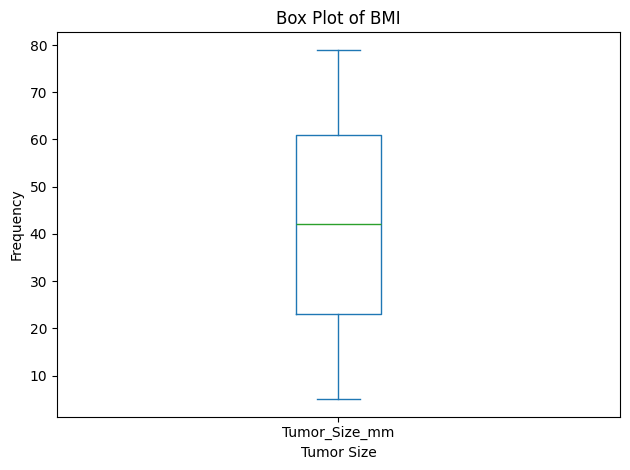

In [8]:
colorectal_cancer["Tumor_Size_mm"].plot.box()
plt.title('Box Plot of BMI')
plt.xlabel('Tumor Size')
plt.ylabel('Frequency')
plt.grid(False)
plt.tight_layout()
plt.show()

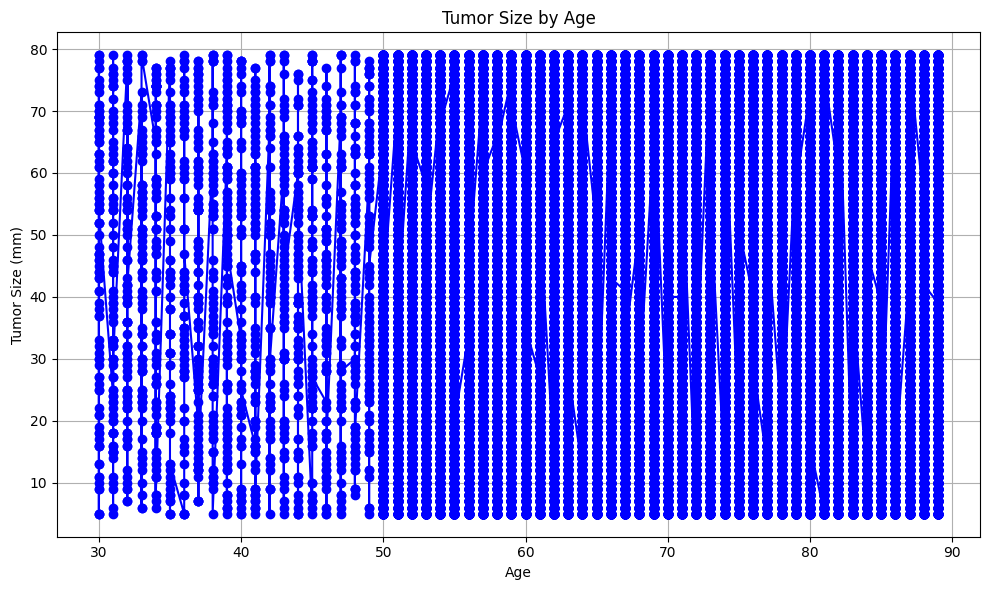

In [10]:
colorectal_cancer = colorectal_cancer.sort_values(by='Age')

plt.figure(figsize=(10, 6))
plt.plot(colorectal_cancer['Age'], colorectal_cancer['Tumor_Size_mm'], marker='o', linestyle='-', color='blue')
plt.title('Tumor Size by Age')
plt.xlabel('Age')
plt.ylabel('Tumor Size (mm)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
correlation_matrix = colorectal_cancer.corr(numeric_only=True)
correlation_matrix

,Patient_ID,Age,Tumor_Size_mm,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K
Patient_ID,1.000000,0.002713,-0.004974,0.001838,0.002999,0.001498
Age,0.002713,1.000000,-0.003226,0.003813,0.000367,-0.002171
Tumor_Size_mm,-0.004974,-0.003226,1.000000,-0.000765,-0.000487,0.000788
Healthcare_Costs,0.001838,0.003813,-0.000765,1.000000,0.003578,-0.004991
Incidence_Rate_per_100K,0.002999,0.000367,-0.000487,0.003578,1.000000,-0.000609
Mortality_Rate_per_100K,0.001498,-0.002171,0.000788,-0.004991,-0.000609,1.000000


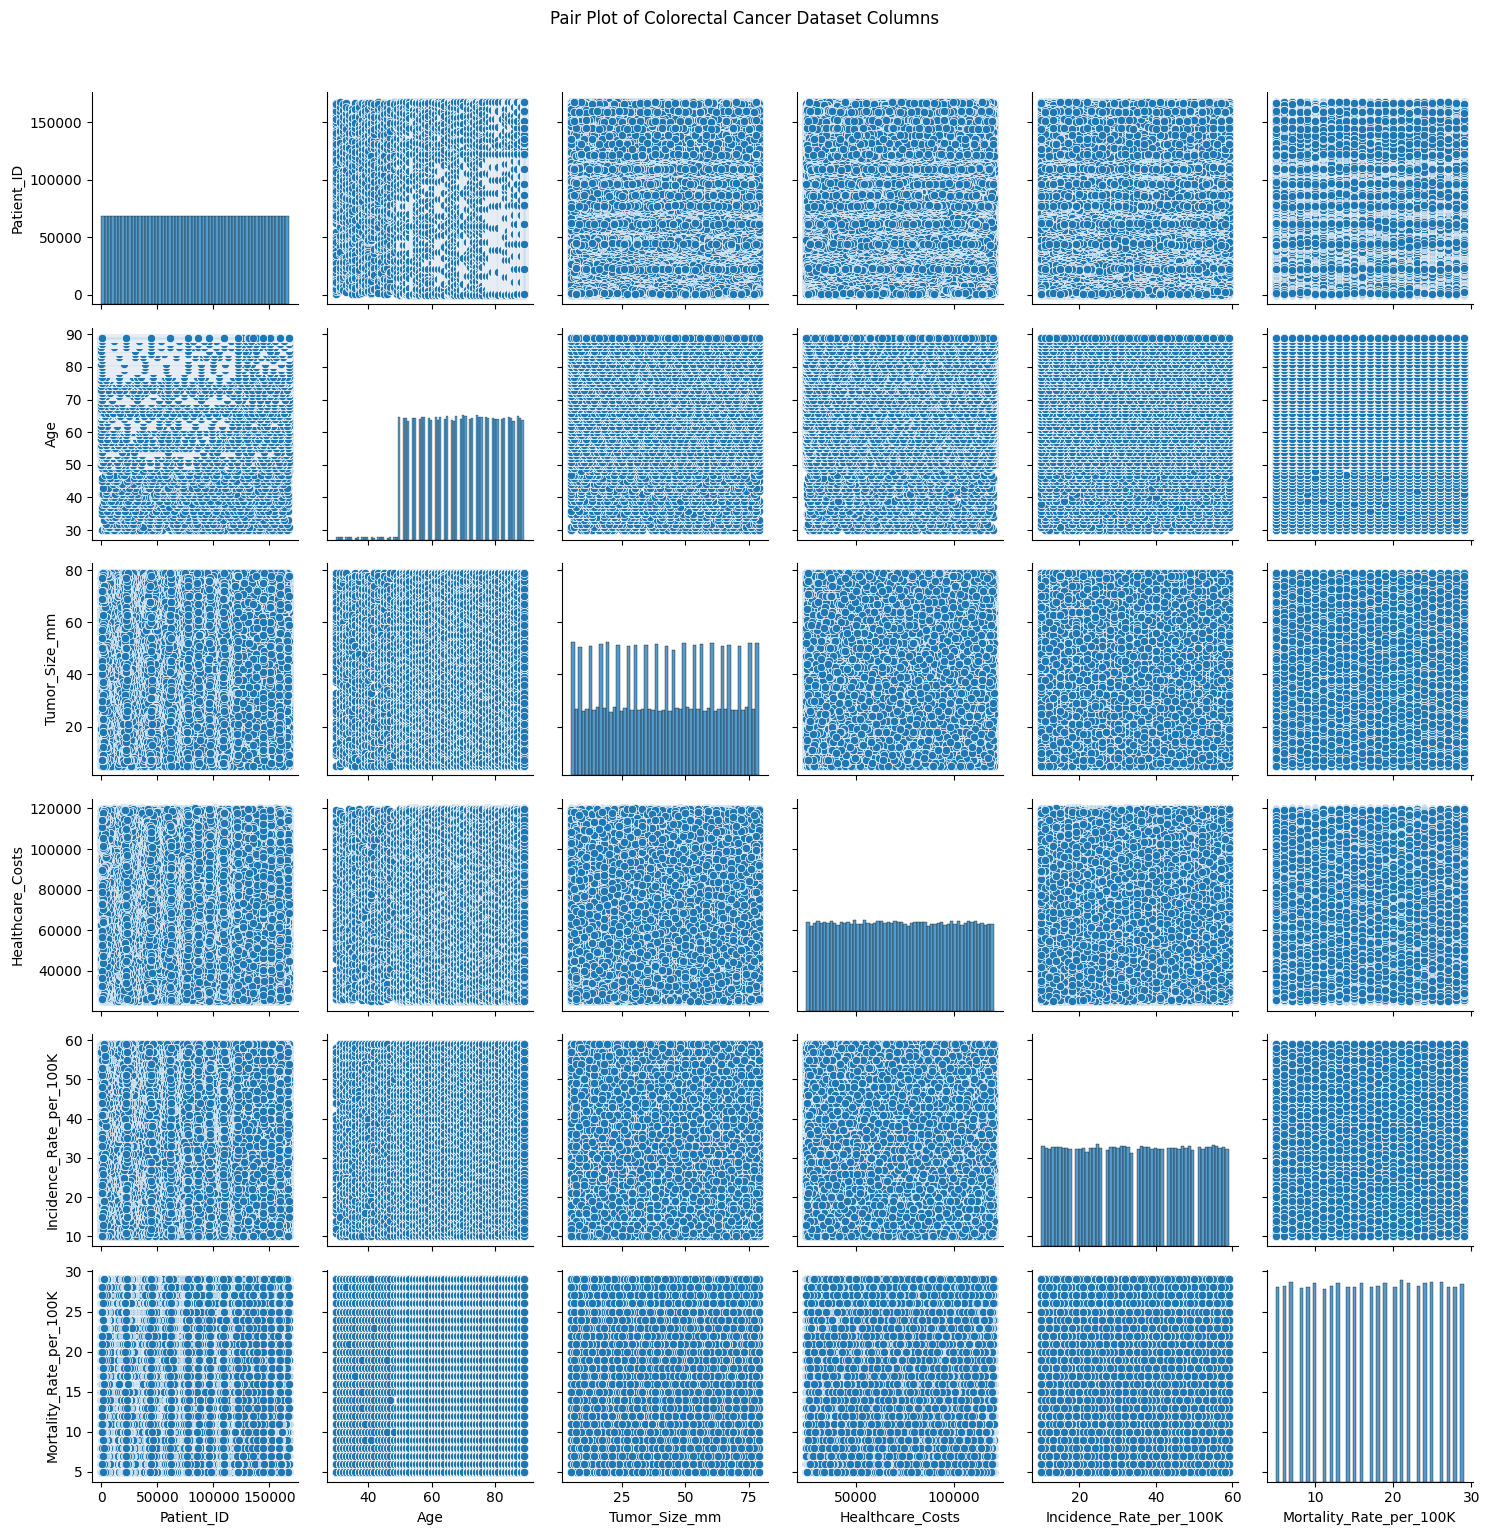

In [12]:
sns.pairplot(colorectal_cancer)
plt.suptitle("Pair Plot of Colorectal Cancer Dataset Columns", y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
# The data in the colorectal cancer data set does not immediately visualize any patterns with the charts I created. I will have to do more analysis of the data to find the informative relationships.
# The correlation matrix shows no two columns have any correlations close to 1. 

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

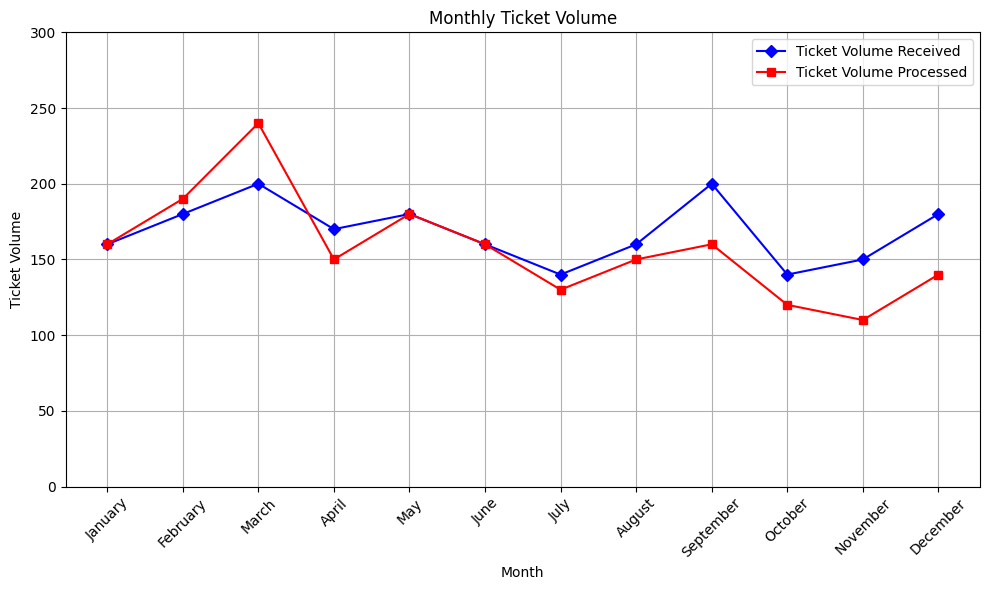

In [13]:
months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']

ticket_received = [160, 180, 200, 170, 180, 160, 140, 160, 200, 140, 150, 180]
ticket_processed = [160, 190, 240, 150, 180, 160, 130, 150, 160, 120, 110, 140]

plt.figure(figsize=(10, 6))
plt.plot(months, ticket_received, marker='D', linestyle='-', color='blue', label='Ticket Volume Received')
plt.plot(months, ticket_processed, marker='s', linestyle='-', color='red', label='Ticket Volume Processed')

plt.xlabel('Month')
plt.ylabel('Ticket Volume')
plt.title('Monthly Ticket Volume')
plt.xticks(rotation=45)
plt.ylim(0, 300)
plt.grid(True)

plt.legend()

plt.tight_layout()
plt.show()